In [2]:
import pandas as pd

file_path = 'bicicleteros.csv'
data = pd.read_csv(file_path)
print(data.head())


        long        lat  id                  nombre  anio_de_in tipo  \
0 -58.456938 -34.626656   1        LINEA A CARABOBO        2011   4U   
1 -58.448757 -34.623699   2            LINEA A PUAN        2011   4U   
2 -58.441380 -34.620616   3   LINEA A PRIMERA JUNTA        2011   4U   
3 -58.436347 -34.618144   4          LINEA A ACOYTE        2011   4U   
4 -58.429896 -34.615279   5  LINEA A RIO DE JANEIRO        2011   4U   

   cantidad    ubicacion clasificac          calle  altura          calle2  \
0       1.0  VIA PUBLICA      SUBTE  RIVADAVIA AV.       0    CARABOBO AV.   
1       1.0  VIA PUBLICA      SUBTE  RIVADAVIA AV.       0            PUAN   
2       1.0  VIA PUBLICA      SUBTE  RIVADAVIA AV.       0           ROJAS   
3       1.0  VIA PUBLICA      SUBTE  RIVADAVIA AV.       0      ACOYTE AV.   
4       1.0  VIA PUBLICA      SUBTE  RIVADAVIA AV.       0  RIO DE JANEIRO   

      barrio    comuna  codigo_postal codigo_postal_argentino  
0     Flores  Comuna 7            

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

grouped_data = data.groupby('anio_de_in')['cantidad'].sum()

grouped_data = grouped_data.sort_index()
print(grouped_data)


installations_per_year = data['anio_de_in'].sum('cantidad').sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=installations_per_year.index, y=installations_per_year.values, palette="Blues_d")

plt.title('Cantidad de Bicicleteros Instalados por Año', fontsize=14)
plt.xlabel('Año de Instalación', fontsize=12)
plt.ylabel('Cantidad de Bicicleteros', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


ValueError: No axis named cantidad for object type Series

In [12]:
grouped_data = data.groupby('tipo').size()
print(grouped_data)


tipo
1        29
1U      336
4U      569
Lazo      4
dtype: int64


In [15]:
grouped_data = data.groupby('cantidad').size()
print(grouped_data)


cantidad
1.0     603
2.0     152
3.0      62
4.0      33
5.0      28
6.0      13
7.0       6
8.0       8
9.0       2
10.0      7
11.0      3
12.0      3
13.0      1
14.0      1
15.0      2
34.0      1
39.0      1
56.0      1
68.0      1
dtype: int64


In [18]:
import pandas as pd

grouped_data = data.groupby('anio_de_in')['cantidad'].sum()
grouped_data = grouped_data.sort_index()
print(grouped_data)


anio_de_in
0        14.0
2011    107.0
2012     15.0
2013    438.0
2014    133.0
2015    236.0
2016     35.0
2017    242.0
2018    529.0
2019    211.0
Name: cantidad, dtype: float64


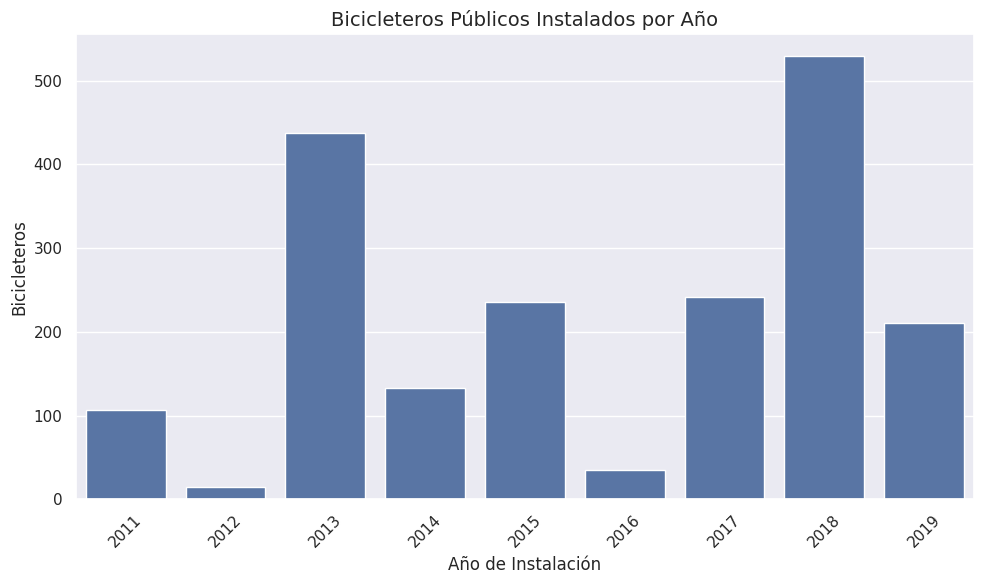

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'bicicleteros.csv'
data = pd.read_csv(file_path)

filtered_data = data[data['anio_de_in'] != 0]
grouped_data = filtered_data.groupby('anio_de_in')['cantidad'].sum().sort_index()

sns.set_theme(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)

plt.title('Bicicleteros Públicos Instalados por Año', fontsize=14)
plt.xlabel('Año de Instalación', fontsize=12)
plt.ylabel('Bicicleteros', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [36]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium

geometry = [Point(xy) for xy in zip(data['long'], data['lat'])]
gdf = gpd.GeoDataFrame(data, geometry=geometry)

gdf['distance_to_nearest'] = gdf.geometry.apply(lambda x: gdf.geometry.distance(x).min())

mapa = folium.Map(location=[-34.6083, -58.3712], zoom_start=12)

for idx, row in gdf.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=2,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.2,
        popup=f"Bicicleteros: {row['cantidad']}"
    ).add_to(mapa)

mapa

In [33]:
from folium.plugins import HeatMap
mapa2 = mapa
# Crear un mapa de calor
heat_data = [[row['lat'], row['long']] for index, row in gdf.iterrows()]
HeatMap(heat_data, radius=15).add_to(mapa2)

# Guardar el mapa en un archivo HTML
mapa2